<a href="https://colab.research.google.com/github/rtajeong/M4_2025/blob/main/lab_05_keras_intro_rev5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Keras
- The core data structures of Keras are **layers** and **models**.
- models:
  - sequential model (linear stack of layers)
  - functional API model
- from https://keras.io/guides/functional_api/

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import to_categorical

# Models and Layers
- Layer: inner computation block
- Model: define the outer model

## Layers in Keras
- A layer encapsulates both:
  - a state (the layer's "weights") and
  - a transformation from inputs to outputs (a "call", the layer's forward pass)
  

## Models and Layers examples
- Input() : used to instantiate a Keras tensor (Keras tensor: a symbolic tensor-like object, which we augment with certain attributes)
- Dense, Flatten, Conv2D, SimpleRNN, ...

In [2]:
# 784-dimensional vector input (flattened)
inputs = Input(shape=(784,))   # 784-dimensional vector. The batch size is always omitted
                               # since only the shape of each sample is specified.
# image input
img_inputs = Input(shape=(28, 28, 1))

In [3]:
inputs.shape, img_inputs.shape, inputs.dtype, img_inputs.dtype

((None, 784), (None, 28, 28, 1), 'float32', 'float32')

In [4]:
# input
inputs = Input(shape=(784,))
x = layers.Dense(64, activation="relu")(inputs)
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(10)(x)

In [6]:
# create Model (should begin with Input() layer)
model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")

In [7]:
model.summary()

Model: "mnist_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,050 (215.04 KB)

 Trainable params: 55,050 (215.04 KB)

 Non-trainable params: 0 (0.00 B)

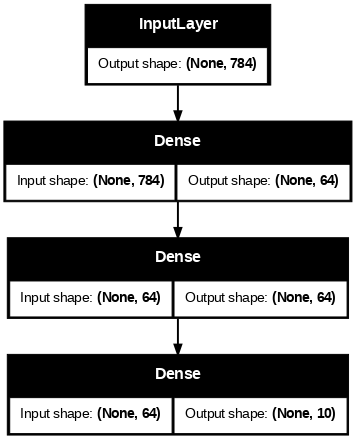

In [8]:
keras.utils.plot_model(model, "my_first_model.png", show_shapes=True, dpi=70)

## using Sequential API

In [10]:
# Sequential API
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,050 (215.04 KB)

 Trainable params: 55,050 (215.04 KB)

 Non-trainable params: 0 (0.00 B)

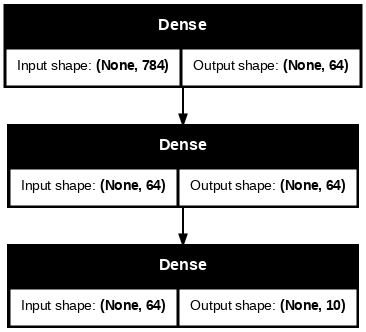

In [11]:
# plot the model

keras.utils.plot_model(model, "my_first_model_with_shape_info.png", show_shapes=True, dpi=72)

## using Functional API

In [14]:
inputs = Input(shape=(784,))
x = Dense(64, activation="relu")(inputs)
x = Dense(64, activation="relu")(x)
outputs = Dense(10, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs, name="mnist_model")
model.summary()

Model: "mnist_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,050 (215.04 KB)

 Trainable params: 55,050 (215.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# no of parameters to train
# 784 * 64 + 64 = 50240
# 64 * 64 + 64 = 4160
# 64 * 10 + 10 = 650

# Training, evaluation, and Inference

---
- try to use Sequential() model, with MNIST dataset

In [15]:
from tensorflow.keras.datasets.mnist import load_data
(x_train, y_train), (x_test, y_test) = load_data()
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


In [16]:
x_train = x_train.reshape(60000, 784).astype("float32") / 255.
x_test = x_test.reshape(10000, 784).astype("float32") / 255.

In [17]:
# one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
print(y_train.shape, y_test.shape)

(60000, 10) (10000, 10)


In [18]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [24]:
model.compile(
    loss=keras.losses.CategoricalCrossentropy(from_logits=False),
    optimizer=keras.optimizers.Adam(),
    metrics=["accuracy"],
)
# from_logits=True: inform the loss function that the output values generated by the model
# are not normalized, a.k.a. logits. (i.e. softmax function has not been applied on them)
history = model.fit(x_train, y_train, batch_size=100, epochs=5, validation_split=0.2)

test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Epoch 1/5
480/480 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9787 - loss: 0.0717 - val_accuracy: 0.9688 - val_loss: 0.1076
Epoch 2/5
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9819 - loss: 0.0583 - val_accuracy: 0.9717 - val_loss: 0.0947
Epoch 3/5
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9848 - loss: 0.0516 - val_accuracy: 0.9725 - val_loss: 0.0969
Epoch 4/5
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9863 - loss: 0.0450 - val_accuracy: 0.9720 - val_loss: 0.0973
Epoch 5/5
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9877 - loss: 0.0382 - val_accuracy: 0.9722 - val_loss: 0.0997
313/313 - 1s - 4ms/step - accuracy: 0.9751 - loss: 0.0880
Test loss: 0.08795670419931412
Test accuracy: 0.9750999808311462


- we can see that size(train)=60000*0.8=48000 (480 steps/epoch)
- and size(val) = 60000*0.2=12000

In [20]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

## Save the model
---

- There are two different types of saving models
  - Tensorflow SavedModel (recommended)
    - model architecture
    - model weight values (that were learned during training)
    - model training config, if any (as passed to compile)
    - optimizer and its state, if any (to restart training where you left off)
  - previous keras H5 (simplified version)
  - for more information: see https://www.tensorflow.org/guide/keras/save_and_serialize?hl=ko

In [25]:
# method 1: savedmodel type (keras 포맷) - keras 표준 (권장)
# 모델 구조, 가중치, 옵티마이저 상태까지 모두 저장 - 단일 파일로 관리 편리

model.save("my_model.keras")
del model
# Recreate the exact same model purely from the file:
model = keras.models.load_model("my_model.keras")

In [22]:
# method 2: hdf5 (.h5) type - Old type
model.save("my_model.h5")
del model
model = keras.models.load_model("my_model.h5")

# To define multiple models
- a single graph of layers can be used to generate multiple models

In [26]:
encoder_input = Input(shape=(28, 28, 1))
x = layers.Conv2D(16, 3, activation="relu")(encoder_input)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.MaxPooling2D(3)(x)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.Conv2D(16, 3, activation="relu")(x)
encoder_output = layers.GlobalMaxPooling2D()(x)
            # (batch_size, rows, columns, channels)->(batch_size, channels)

encoder = Model(encoder_input, encoder_output, name="encoder")
encoder.summary()

x = layers.Reshape((4, 4, 1))(encoder_output)
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu")(x)
x = layers.UpSampling2D(3)(x)
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
decoder_output = layers.Conv2DTranspose(1, 3, activation="relu")(x)

autoencoder = Model(encoder_input, decoder_output, name="autoencoder")
autoencoder.summary()

Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 6, 6, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 4, 4, 16)       │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d            │ (None, 16)             │             0 │
│ (GlobalMaxPooling2D)            │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,672 (72.94 KB)

 Trainable params: 18,672 (72.94 KB)

 Non-trainable params: 0 (0.00 B)

Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 6, 6, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 4, 4, 16)       │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d            │ (None, 16)             │             0 │
│ (GlobalMaxPooling2D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 4, 4, 1)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 6, 6, 16)       │           160 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 8, 8, 32)       │         4,640 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 26, 26, 16)     │         4,624 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_3              │ (None, 28, 28, 1)      │           145 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,241 (110.32 KB)

 Trainable params: 28,241 (110.32 KB)

 Non-trainable params: 0 (0.00 B)

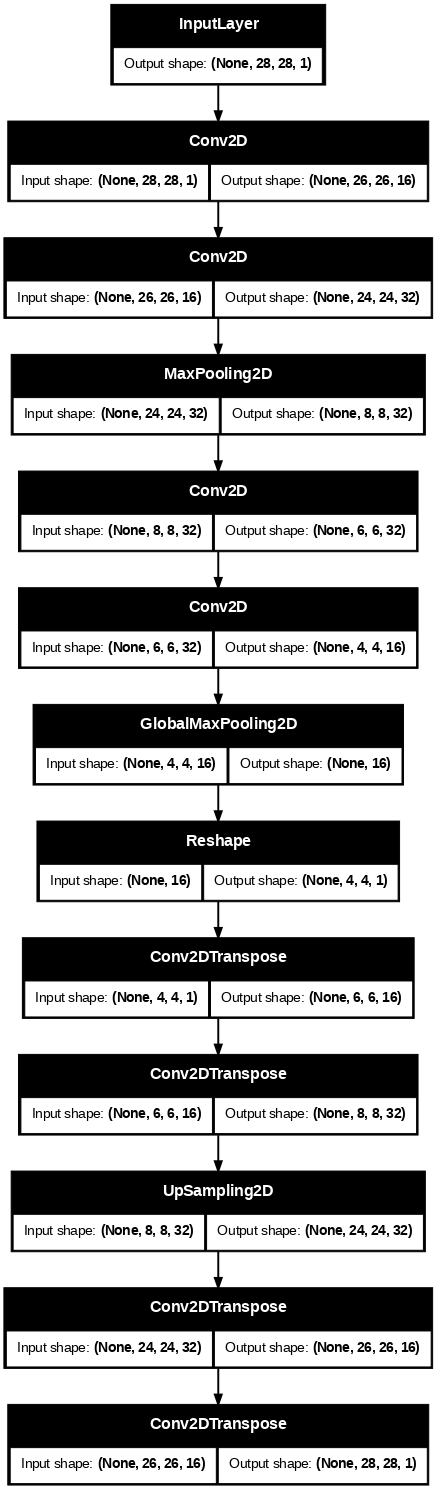

In [28]:
keras.utils.plot_model(autoencoder, "my_autoencoder_info.png", show_shapes=True, dpi=70)

## All models are callable, just like layers
---

In [29]:
encoder_input = Input(shape=(28, 28, 1), name="original_img")
x = layers.Conv2D(16, 3, activation="relu")(encoder_input)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.MaxPooling2D(3)(x)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.Conv2D(16, 3, activation="relu")(x)
encoder_output = layers.GlobalMaxPooling2D()(x)  # pool size equals to the size of the input

encoder = keras.Model(encoder_input, encoder_output, name="encoder")
encoder.summary()

decoder_input = keras.Input(shape=(16,), name="encoded_img")
x = layers.Reshape((4, 4, 1))(decoder_input)
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu")(x)
x = layers.UpSampling2D(3)(x)
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
decoder_output = layers.Conv2DTranspose(1, 3, activation="relu")(x)

decoder = keras.Model(decoder_input, decoder_output, name="decoder")
decoder.summary()

autoencoder_input = keras.Input(shape=(28, 28, 1), name="img")
encoded_img = encoder(autoencoder_input)              # model called
decoded_img = decoder(encoded_img)
autoencoder = keras.Model(autoencoder_input, decoded_img, name="autoencoder")
autoencoder.summary()

Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ original_img (InputLayer)       │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 24, 24, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 6, 6, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 4, 4, 16)       │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d_1          │ (None, 16)             │             0 │
│ (GlobalMaxPooling2D)            │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,672 (72.94 KB)

 Trainable params: 18,672 (72.94 KB)

 Non-trainable params: 0 (0.00 B)

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ encoded_img (InputLayer)        │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 4, 4, 1)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_4              │ (None, 6, 6, 16)       │           160 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_5              │ (None, 8, 8, 32)       │         4,640 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_6              │ (None, 26, 26, 16)     │         4,624 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_7              │ (None, 28, 28, 1)      │           145 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,569 (37.38 KB)

 Trainable params: 9,569 (37.38 KB)

 Non-trainable params: 0 (0.00 B)

Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ img (InputLayer)                │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder (Functional)            │ (None, 16)             │        18,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Functional)            │ (None, 28, 28, 1)      │         9,569 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,241 (110.32 KB)

 Trainable params: 28,241 (110.32 KB)

 Non-trainable params: 0 (0.00 B)

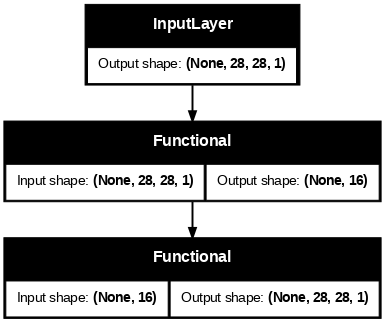

In [30]:
keras.utils.plot_model(autoencoder, "my_second_autoencoder_info.png", show_shapes=True, dpi=70)

# Backend operation
- keras is a model-level library, so does not have low-level operations, such as tensor products, convolutions, so on.
- It uses Backend library for low-level functions.
- tf.* 함수 사용 권장 (Backend 사용 필요없음)

In [31]:
!echo $HOME

/root


In [32]:
!ls -a /root

.   .bashrc  .config   .julia	 .keras		.local	.nv	  .tmux.conf
..  .cache   .ipython  .jupyter  .launchpadlib	.npm	.profile  .wget-hsts


In [33]:
!more $HOME/.keras/keras.json   # backend (for low level functions) is tensorflow
                                # among Tensorflow, Theano, CNTK

{
    "floatx": "float32",
    "epsilon": 1e-07,
    "backend": "tensorflow",
    "image_data_format": "channels_last"
}


In [35]:
from tensorflow.keras import backend as K
# Keras backend는 여러 엔진을 지원하기 위해 필요했음.
# 현재: TensorFlow만 사실상 지원하므로, 직접 TensorFlow 함수(tf.*) 사용 권장
# 내부적으로 tf.* 함수 호출

a = K.constant([[1,-1],[-1,0]], dtype=tf.float32, shape=[2,2])
K.dot(a, K.transpose(a))

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[ 2., -1.],
       [-1.,  1.]], dtype=float32)>

In [36]:
np.random.normal(0, 1, size=(2,2))

array([[ 0.64227581, -0.29401914],
       [ 0.25673841, -1.62446154]])

In [37]:
tf.ones((2,2,2)), K.ones((2,2,2))

(<tf.Tensor: shape=(2, 2, 2), dtype=float32, numpy=
 array([[[1., 1.],
         [1., 1.]],
 
        [[1., 1.],
         [1., 1.]]], dtype=float32)>,
 <tf.Variable 'Variable:0' shape=(2, 2, 2) dtype=float32, numpy=
 array([[[1., 1.],
         [1., 1.]],
 
        [[1., 1.],
         [1., 1.]]], dtype=float32)>)

In [38]:
type(tf.ones((2,2,2))), type(K.ones((2,2,2)))

(tensorflow.python.framework.ops.EagerTensor,
 tensorflow.python.ops.resource_variable_ops.ResourceVariable)

In [40]:
val = np.random.normal(loc=[1, 10, 100])  # mean = [1, 10, 100] ( 3 samples)
var = K.variable(value=val)

var_0 = K.zeros(shape=(2, 2, 2))
var_1 = K.ones(shape=(2, 2, 2))
val, var, var_0, var_1

(array([ 1.75683706, 11.10032983, 99.00397845]),
 <tf.Variable 'Variable:0' shape=(3,) dtype=float32, numpy=array([ 1.756837, 11.100329, 99.003975], dtype=float32)>,
 <tf.Variable 'Variable:0' shape=(2, 2, 2) dtype=float32, numpy=
 array([[[0., 0.],
         [0., 0.]],
 
        [[0., 0.],
         [0., 0.]]], dtype=float32)>,
 <tf.Variable 'Variable:0' shape=(2, 2, 2) dtype=float32, numpy=
 array([[[1., 1.],
         [1., 1.]],
 
        [[1., 1.],
         [1., 1.]]], dtype=float32)>)

In [41]:
# Initializing Tensors with Random Numbers (same as tf.Variable)
b = K.random_uniform_variable(shape=(2,2), low=0, high=1) # Uniform distribution
c = K.random_normal_variable(shape=(2,2), mean=0, scale=1) # Gaussian distribution
print(b, '\n', c)

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[0.40140927, 0.1274147 ],
       [0.03194106, 0.29992056]], dtype=float32)> 
 <tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[0.35819605, 0.9178761 ],
       [0.16235259, 1.32437   ]], dtype=float32)>


In [42]:
tf.random.set_seed(1)
var1 = tf.Variable(tf.random.normal(shape=(2,2)))
tf.random.set_seed(1)
var2 = K.variable(tf.random.normal(shape=(2,2)))
var1, var2

(<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
 array([[-1.1012201 ,  1.5457516 ],
        [ 0.383644  , -0.87965786]], dtype=float32)>,
 <tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
 array([[-1.1012201 ,  1.5457516 ],
        [ 0.383644  , -0.87965786]], dtype=float32)>)

In [43]:
a, b, c

(<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[ 1., -1.],
        [-1.,  0.]], dtype=float32)>,
 <tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
 array([[0.40140927, 0.1274147 ],
        [0.03194106, 0.29992056]], dtype=float32)>,
 <tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
 array([[0.35819605, 0.9178761 ],
        [0.16235259, 1.32437   ]], dtype=float32)>)

In [44]:
# Tensor Arithmetic
b + c * K.abs(a)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0.7596053 , 1.0452908 ],
       [0.19429365, 0.29992056]], dtype=float32)>

In [45]:
K.dot(a, K.transpose(b))

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[ 0.27399457, -0.2679795 ],
       [-0.40140927, -0.03194106]], dtype=float32)>

In [46]:
K.sum(b, axis=1)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.528824  , 0.33186162], dtype=float32)>

In [47]:
K.softmax(b)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0.56807333, 0.43192673],
       [0.4334032 , 0.5665968 ]], dtype=float32)>

In [48]:
K.concatenate([b, c], axis=-1)

<tf.Tensor: shape=(2, 4), dtype=float32, numpy=
array([[0.40140927, 0.1274147 , 0.35819605, 0.9178761 ],
       [0.03194106, 0.29992056, 0.16235259, 1.32437   ]], dtype=float32)>

In [49]:
K.prod(a, axis=1)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([-1., -0.], dtype=float32)>

In [ ]:
# K.shape(), K.ndim(), K.dtype(), K.eval(), K.zeros(), K.ones(),
# K.eye(), K.zeros_like(), K.ones_like(), K.cast(), K.update(),
# K.update_add(), K.update_sub(), K.dot(), K.batch_dot(), K.transpose(),
# K.{max(),min(), sum()}, K.cumsum(), K.cumprod(), K.std(), K.mean(),
# any, all, argmax, argmin, square, abs, sqrt, exp, log, round, sign, pow,
# clip, equal, not_equal, greater, reshape, resize_images, ...

- For detailed information, please refer to https://keras.io/ko/backend/

# Simple Examples
- https://machinelearningmastery.com/how-to-make-classification-and-regression-predictions-for-deep-learning-models-in-keras/

## Classification

In [51]:
# example of training a final classification model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler
# generate 2d classification dataset
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=1)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
# define and fit the final model
model = Sequential()
model.add(Input(shape=(2,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam')
model.fit(X, y, epochs=200, verbose=0)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37 (148.00 B)

 Trainable params: 37 (148.00 B)

 Non-trainable params: 0 (0.00 B)

- prediction: two types
  - class prediction
  - probability prediction

In [52]:
# predict the result for a new data Xnew
Xnew, _ = make_blobs(n_samples=3, centers=2, n_features=2, random_state=1)
Xnew = scaler.transform(Xnew)

# make a prediction for probability
print('Probability...')
ynew = model.predict(Xnew)
for i in range(len(Xnew)):
	print("X=%s, Predicted=%s" % (Xnew[i], ynew[i]))

Probability...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
X=[0.89337759 0.65864154], Predicted=[0.04481013]
X=[0.29097707 0.12978982], Predicted=[0.7752864]
X=[0.78082614 0.75391697], Predicted=[0.04629127]


In [53]:
# make a prediction for classes
ynew = (model.predict(Xnew) > 0.5).astype("int32")
# show the inputs and predicted outputs
print('Classes...')
for i in range(len(Xnew)):
	print("X=%s, Predicted=%s" % (Xnew[i], ynew[i]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Classes...
X=[0.89337759 0.65864154], Predicted=[0]
X=[0.29097707 0.12978982], Predicted=[1]
X=[0.78082614 0.75391697], Predicted=[0]


## Regression

In [54]:
# with scaling target values
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler

X, y = make_regression(n_samples=100, n_features=2, noise=0.05, random_state=1)
scalerX, scalerY = StandardScaler(), StandardScaler()
scalerX.fit(X)
scalerY.fit(y.reshape(100,1))   # (100,) -> (100,1)
X = scalerX.transform(X)
y = scalerY.transform(y.reshape(100,1))

# define and fit the final model
model = Sequential()
model.add(Input(shape=(2,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()
model.compile(loss='mse', optimizer='adam')
model.fit(X, y, epochs=1000, verbose=0)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37 (148.00 B)

 Trainable params: 37 (148.00 B)

 Non-trainable params: 0 (0.00 B)

In [55]:
# new instances to predict
Xnew, a = make_regression(n_samples=3, n_features=2, noise=0.05, random_state=7)
Xnew = scalerX.transform(Xnew)
ynew = model.predict(Xnew)

for i in range(len(Xnew)):
	print("X=%s, Predicted=%s" % (Xnew[i], ynew[i]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
X=[0.04887696 0.21052199], Predicted=[0.2437036]
X=[ 1.80651612 -0.80617796], Predicted=[-0.10476613]
X=[-0.82240444 -0.26142258], Predicted=[-0.57564646]


In [56]:
model(Xnew)            # -> tensor (텐서 기반, 미분 가능)

<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[ 0.24370354],
       [-0.10476613],
       [-0.57564646]], dtype=float32)>

In [57]:
model.predict(Xnew)    # -> array (result is the same as the above), (넘파이 기반, 추론 전용)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


array([[ 0.2437036 ],
       [-0.10476613],
       [-0.57564646]], dtype=float32)

In [58]:
# to compare with the real value
import pandas as pd
res = np.concatenate([scalerY.inverse_transform(ynew), a.reshape(-1,1)], axis=1)
pd.DataFrame(res, columns=["predicted", "real"])

,predicted,real
0,37.728428,21.282072
1,11.186203,22.139789
2,-24.679783,-21.105786


In [59]:
from sklearn.metrics import mean_squared_error
mean_squared_error (a, scalerY.inverse_transform(ynew))

134.41237149989877

In [ ]:
# without target scaling

X, y = make_regression(n_samples=100, n_features=2, noise=0.05, random_state=1)
scalerX = StandardScaler()
X = scalerX.fit_transform(X)

# define and fit the final model
model = Sequential()
model.add(Dense(4, input_dim=2, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='adam')
model.fit(X, y, epochs=1000, verbose=0)

Xnew, a = make_regression(n_samples=3, n_features=2, noise=0.05, random_state=7)
Xnew = scalerX.transform(Xnew)
# make a prediction
ynew = model.predict(Xnew)
# show the inputs and predicted outputs
for i in range(len(Xnew)):
	print("X=%s, Predicted=%s" % (Xnew[i], ynew[i]))

In [ ]:
mean_squared_error (a, ynew) # worse

- linear regression

In [ ]:
# linear regression
from sklearn.linear_model import LinearRegression
X, y = make_regression(n_samples=100, n_features=2, noise=0.05, random_state=1)
scalerX = StandardScaler()
X = scalerX.fit_transform(X)

lin_model = LinearRegression()
lin_model.fit(X, y)

Xnew, a = make_regression(n_samples=3, n_features=2, noise=0.05, random_state=7)
Xnew = scalerX.transform(Xnew)

lin_model.predict(Xnew), a, Xnew

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error (a, lin_model.predict(Xnew))

# How to create a new layer in Keras
- keras.layers.Layer
  - the class from which all layers inherit
  - It involves *computation*, defined in the `call()` method, and a weights.
- The weights can be defined in two ways:
  - by using add_weight()
  - by overriding build() : more flexible

In [60]:
import tensorflow as tf
from tensorflow import keras

In [62]:
## Example: the method `add_weight()` offers a shortcut to create weights

class SimpleDense(keras.layers.Layer):
    def __init__(self, units=32, input_dim=32):
        super().__init__()
        self.w = self.add_weight(shape=(input_dim, units), initializer="random_normal", trainable=True)
        self.b = self.add_weight(shape=(units,), initializer="zeros", trainable=True)

    def call(self, inputs):
        return tf.matmul(inputs, self.w) + self.b

In [63]:
x = tf.ones((2, 2))
linear_layer = SimpleDense(4, 2)
y = linear_layer(x)
print(y)

tf.Tensor(
[[ 0.13521202 -0.06053857 -0.04652669  0.13820136]
 [ 0.13521202 -0.06053857 -0.04652669  0.13820136]], shape=(2, 4), dtype=float32)


In [64]:
# Note that the weights w and b are automatically tracked by the layer upon being set as layer attributes:
assert linear_layer.weights == [linear_layer.w, linear_layer.b]

In [65]:
linear_layer.weights

[<Variable path=simple_dense/variable, shape=(2, 4), dtype=float32, value=[[ 0.02445336 -0.05051326 -0.02383408  0.05696777]
  [ 0.11075866 -0.01002531 -0.02269261  0.08123358]]>,
 <Variable path=simple_dense/variable_1, shape=(4,), dtype=float32, value=[0. 0. 0. 0.]>]

# Exercise

## model.build()

- model.build()
  - 일반적으로 Keras에서 모델을 설정하고 훈련할 때는 model.build()가 필요하지 않다. Keras는 model.fit() 또는 model.predict() 같은 메서드를 처음 호출할 때 자동으로 모델의 입력 크기를 추론하여 **지연 초기화(lazy initialization)**를 진행합니다. 따라서, 모델의 가중치와 구조는 훈련이나 예측 단계에서 필요한 시점에 자동으로 설정

- 그러나 model.build()를 사용하면 몇 가지 장점이 있다:
  - 명시적인 입력 크기 지정: 서브클래싱 API로 모델을 만들 때, build()를 통해 모델의 입력 크기를 미리 지정할 수 있습니다. 이를 통해 지연 초기화를 피하고, 모델 구조를 바로 확인할 수 있습니다.
  - 빠른 디버깅과 구조 확인: 모델의 입력 크기를 명시하면, model.summary()를 통해 구조를 미리 검토할 수 있어 디버깅과 초기 설정 확인에 유용합니다.
- model.build()가 주로 사용되는 경우
  - 서브클래싱 API를 사용할 때, 특히 입력 크기를 미리 설정하여 모델 구조를 확인하고자 할 때
  - 지연 초기화 없이 모델을 바로 사용할 필요가 있을 때 (예: 초기화와 모델 생성 단계를 분리하고 싶을 때)



## cross entropy (softmax)

In [66]:
import numpy as np

In [67]:
# softmax and (categorical) cross entropy - for multi classes

y = np.array([0., 0., 1.])
y_hat = np.array([-0.8, 0.1, 3.5])

sm = np.exp(y_hat)/np.exp(y_hat).sum()  # softmax
print(sm)

ce = - (y * np.log(sm)).sum() # softmax cross entropy
print(ce)

[0.01296018 0.03187691 0.95516291]
0.04587337062429689


In [68]:
from tensorflow.keras.losses import CategoricalCrossentropy

cce2 = CategoricalCrossentropy(from_logits = False) # default (확률로 변환된 값)
cce2(y, y_hat).numpy()

np.float32(1.192093e-07)

In [ ]:
# from_logits=True ?
# 보통은 사용안함. 특별히 마지막 레이어의 값을 logit 으로 keep 하고 싶은 경우 사용
# 다음 함수는 negative value 인 경우 내부적으로 computational stability 를 고려함.

cce1 = CategoricalCrossentropy(from_logits = True) # 확률로 변환되기 전 값
cce1(y, y_hat).numpy()

In [ ]:
- (y * np.log(y_hat)).sum()  # invalid (negative) values in the logit

In [ ]:
# use the following function, instead

tf.nn.softmax_cross_entropy_with_logits(y, y_hat)

In [ ]:
cce1 = CategoricalCrossentropy(from_logits = True)
cce2 = CategoricalCrossentropy(from_logits = False) # default

y = tf.constant([[1., 0., 0.],
                 [0., 1., 0.],
                 [0., 0., 1.]] )
y_hat = tf.constant([[.1, .8, .1],   # 이미 확률값으로 주어짐 (0~1)
                     [.2, .7, .1],
                     [.5, .3, .2]])

loss1 = cce1(y, y_hat)
loss2 = cce2(y, y_hat)

print(loss1.numpy(), loss2.numpy())

## keras text preprocessing
- text_to_word_sequence(): automatically does 3 things
  - Splits words by space (split=' ')   
  - Filters out punctuation (filters=’!”#$%&()*+,-./:;<=>?@[\]^_`{|}~\t\n’)
  - Converts text to lowercase (lower=True)

- one-hot encoding:
  - one_hot() in keras: word hashing (not a real one-hot encoding function)
  - to_categorical() in keras: one-hot encoding
  - one_hot() in tf : one-hot encoding

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical  # one-hot encoding

In [ ]:
from tensorflow.keras.preprocessing.text import text_to_word_sequence, Tokenizer

text = 'The quick brown fox jumped -- ~ ! , , over the lazy Dog.'
text_to_word_sequence(text)

In [ ]:
from tensorflow.keras.preprocessing.text import one_hot

words = set(text_to_word_sequence(text))
vocab_size = len(words)
print(vocab_size)
# integer encode the document
one_hot(text, n=vocab_size)   # integer encoding

In [ ]:
to_categorical(one_hot(text, n=vocab_size))  # one-hot encoding

- using Tokenizer()

In [ ]:
t = Tokenizer()
t.fit_on_texts([text])
t.word_index

In [ ]:
encoded = t.texts_to_sequences([text])[0]    # integer sequence
encoded

In [ ]:
to_categorical(encoded)

- categorical encoding layer

In [ ]:
# categorical encoding layer
y = [1, 2, 3, 2, 1]
layer = tf.keras.layers.CategoryEncoding(num_tokens=4, output_mode="one_hot")
layer(y)

- tf.one_hot and keras.utils.to_categorical
  - basically the same except that you give depth n in tf.one_hot()
  - returns array and tensor

In [ ]:
y = [1, 2, 3, 2, 1]
tf.keras.utils.to_categorical(y)

In [ ]:
print(tf.one_hot(y, 2))
print(tf.one_hot(y, 4))
print(tf.one_hot(y, 6))

## fit and train_on_batch
- fit(): rain a model on a dataset for a fixed number of epochs
- train_on_batch(): lower-level method that allows you to manually perform a single update step on a single batch of data.

In [ ]:
from tensorflow import keras
import numpy as np
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
tf.random.set_seed(12)
x = np.array([[0.5, 0.7, 0.8]])
y = np.array([[0.4, 0.6, 0.33, 0.77, 0.88, 0.71]])

model = Sequential()
model.add(Dense(100, input_shape=((3,)), activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(6))
model.compile(loss="mse", optimizer="adam")

model.fit(x,y)

In [ ]:
x.shape, y.shape

In [ ]:
from tensorflow import keras
import numpy as np
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
tf.random.set_seed(12)
x = np.array([[0.5, 0.7, 0.8]])
y = np.array([[0.4, 0.6, 0.33, 0.77, 0.88, 0.71]])
print(x.shape, y.shape)

x = np.expand_dims(x, axis=0)   # for specifying the batch size
y = np.expand_dims(y, axis=0)
print(x.shape, y.shape)

model = Sequential()
model.add(Dense(100, input_shape=((1,3)), activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(6))
model.compile(loss="mse", optimizer="adam")

model.train_on_batch(x,y)  # expecting batch data (should have batch size)

## more information about de-convolution

---

- Convolutions
  - Convolutions
  - Dilated Convolutions (a.k.s Astrous Convolutions)
  - Transposed Convolutions (a.k.a. deconvolutions or fractionally strided convolutions)
  - Separable Convolutions
  - from https://towardsdatascience.com/types-of-convolutions-in-deep-learning-717013397f4d

- Difference between UpSample2D and Conv2DTranspose

  - simple scaling up vs. trained
  - UpSampling2D is just a simple scaling up of the image by using nearest neighbor or bilinear upsampling, so nothing smart. Advantage is it's cheap.
  - Conv2DTranspose is a convolution operation whose kernel is learnt (just like normal conv2d operation) while training your model. Using Conv2DTranspose will also upsample its input but the key difference is the model should learn what is the best upsampling for the job.
- transposed convolution
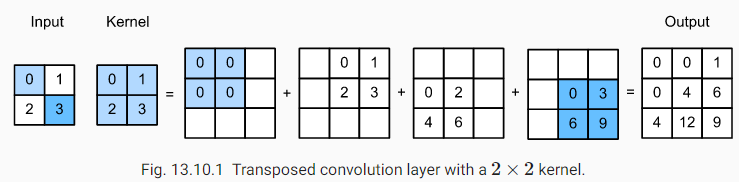